In [22]:
from math import log, sqrt, exp
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Option Pricing
### 1. European call / put option
### 2. Binary call / put option


# 1. European Call / Put Option Pricing
### (Black-Scholes call option formula)

In [24]:
def get_Euro_BSM(S0,K,T,r,sigma, call_or_put):
    d1 = (log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    
    if (call_or_put == "call"):
        value = (S0*stats.norm.cdf(d1,0.0,1.0)-K*exp(-r*T)*stats.norm.cdf(d2,0,1))
    if (call_or_put == "put"):
        value = (K * np.exp(-r * T) * stats.norm.cdf(-d2, 0.0, 1.0) - S0 * stats.norm.cdf(-d1, 0.0, 1.0))
    return value

call = get_Euro_BSM(100,120,1,0.05,0.1, "call")
print('BSM을 이용한 European Call Option Price:', call)

put = get_Euro_BSM(100,120,1,0.05,0.1, "put")
print('BSM을 이용한 European Put Option Price:', put)

BSM을 이용한 European Call Option Price: 0.4624965105634864
BSM을 이용한 European Put Option Price: 14.61002745064917


### (Monte carlo simulation)

In [76]:
def get_Euro_MC(call_or_put, S0,K,T,r,sigma,simul=10000,M=252):
    # I = 10000, M = 252 로 default setting
    
    dt=T/M   
    S=np.zeros((M+1,simul))
    S[0]=S0
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.standard_normal(simul))


    fig=plt.figure(figsize=(10,7))
    plt.plot(S[:,:100])
    plt.title("Monte Carlo Simulation Path")
    # 생성된 I개의 path중에서 첫 100개만 그래프로 출력 
    
    if (call_or_put == "call"):
        payoff = exp(-r*T)*(np.maximum(S[M]-np.array(K),0))
    # 만기시점 T의 주가 ST=S[M]가 I개 있는데 각각의 경우 call option의 payoff를 계산해서 현재시점으로 할인해 list에 저장
    
    if (call_or_put == "put"):
        payoff = exp(-r*T)*(np.maximum(np.array(K)-S[M],0))    
    
    value = np.mean(payoff)

    return value


0.43826515024066737


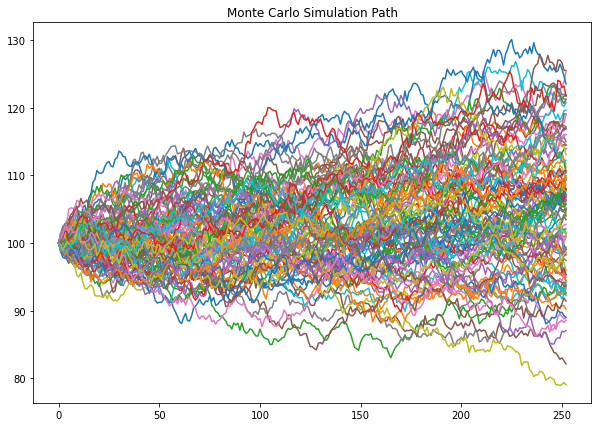

In [77]:
call = get_Euro_MC("call", 100,120,1,0.05,0.1)
print(call)

14.5553567591578


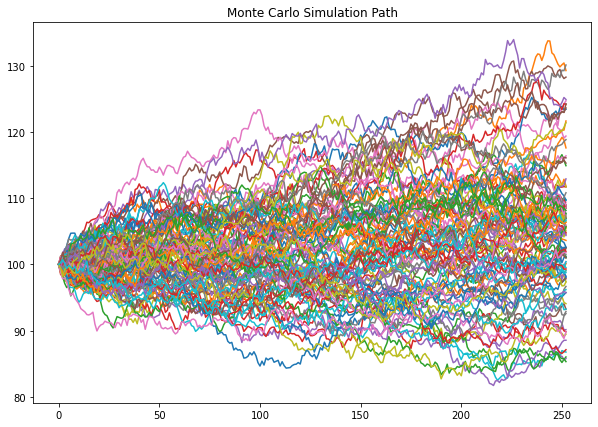

In [78]:
put = get_Euro_MC("put", 100,120,1,0.05,0.1)
print(put)

# 2. Binary Call / Put Option

In [79]:
import random

def Binary_Option(call_or_put, S0, sigma, T, r, K, simul=10000, M=252):
    
    #path 뿌리기
    dt=T/M   
    S=np.zeros((M+1,simul))
    S[0]=S0
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.standard_normal(simul))
    
    payoffs = 0
    if(call_or_put == "call"):    
        for i in range(simul):
            if (S[M][i] >= K):
                payoffs += 1
                
    if(call_or_put == "put"):
        for i in range(simul):            
            if (S[M][i] <= K):
                payoffs += 1            

    # 평균을 구한 후 현재 가치로 할인
    option_price = exp(-r * T) * (payoffs / float(simul))
    
    fig=plt.figure(figsize=(10,7))
    plt.plot(S[:,:100])
    plt.title("Monte Carlo Simulation Path")
    
    
    return option_price
        

Binary call option의 price : 0.08161548462216127


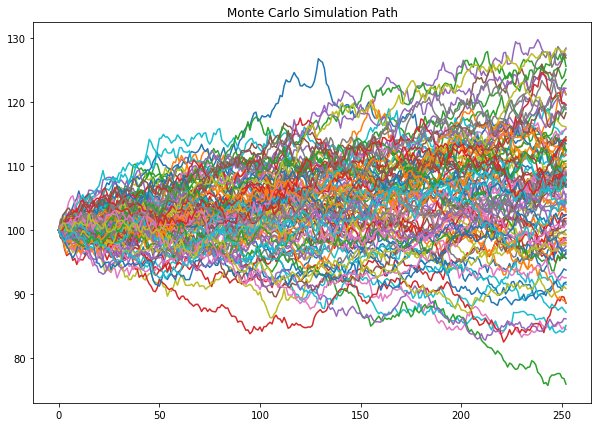

In [80]:
Call = Binary_Option("call", 100, 0.1, 1, 0.05, 120)
print("Binary call option의 price :", Call)

Binary put option의 price : 0.8717066446124543


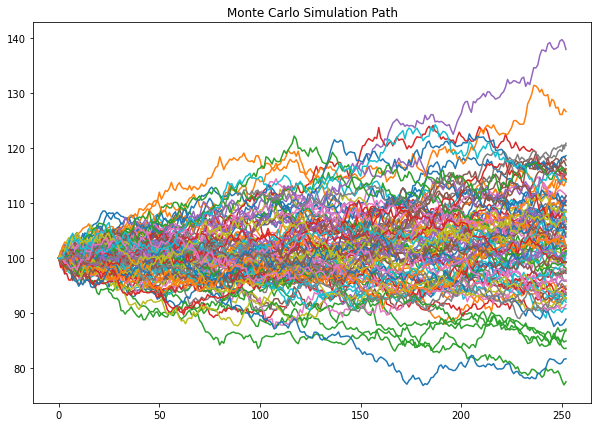

In [81]:
Put = Binary_Option("put", 100, 0.1, 1, 0.05, 120)
print("Binary put option의 price :", Put)

## 아직 안함
# 3. Barrier Option 
# 4. Asian Option

In [84]:
import random

def Barrier_Option(call_or_put, S0, sigma, T, r, K, simul=10000, M=252):
    
    #path 뿌리기
    dt=T/M   
    S=np.zeros((M+1,simul))
    S[0]=S0
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.standard_normal(simul))
    '''
    
    # Knock-IN (Up&In, Down&In)
    
    # Knock-OUT (Up&Out, Down&Out)
    
    '''    
         
        
    
    fig=plt.figure(figsize=(10,7))
    plt.plot(S[:,:100])
    plt.title("Monte Carlo Simulation Path")
    
    
    return option_price
        